# import

In [1]:
from Utilities.utils import *

# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
ED8_data_dict = load_h5(os.path.join(current_working_dir,r"ED8_data.h5"))

# figure A

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_58092\297672279.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


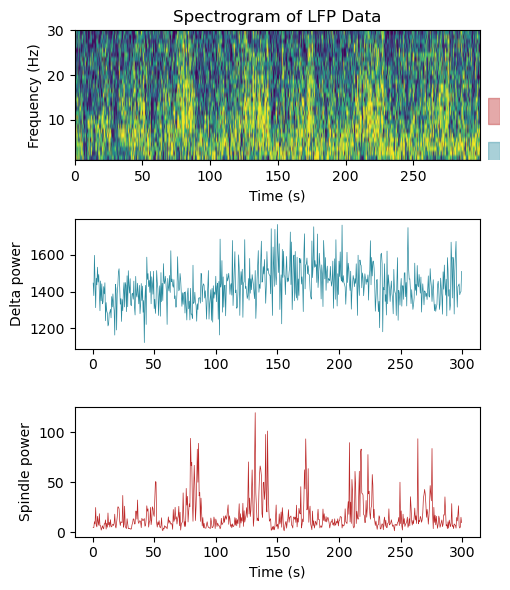

In [2]:
data = ED8_data_dict['spectrogram_data']

log_power = data["log_power"]
frequencies = data["frequencies"]
times = data["times"]

delta_spectral_power = data["delta_spectral_power"]
delta_timestamps = data["delta_timestamps"]

spindle_spectral_power = data["spindle_spectral_power"]
spindle_timestamps = data["spindle_timestamps"]

# plot

fig, [ax, ax1, ax2] = plt.subplots(3, 1, figsize=(5, 6), sharex=False)

im = ax.imshow(
    log_power,
    aspect="auto",
    origin="lower",
    cmap='viridis',
    extent=[0, times.max(), frequencies.min(), frequencies.max()],
    vmin=-5,
    vmax=10,
)

ax.set_ylabel("Frequency (Hz)")
ax.set_xlabel("Time (s)")
ax.set_title("Spectrogram of LFP Data")
ax.set_ylim(1, 30)

# Highlight frequency bands
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# Create a narrow axis to the right of the spectrogram
ax_band = inset_axes(
    ax,
    width="3%",      # thin vertical bar
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.02, 0, 1, 1),  # push it outside to the right
    bbox_transform=ax.transAxes,
    borderpad=0,
)
# Match frequency limits
ax_band.set_ylim(1, 30)
ax_band.set_xlim(0, 1)
# Drw bands
ax_band.axhspan(0.5, 5, color="#298A9E", alpha=0.4)
ax_band.axhspan(9, 15, color="#BC2828", alpha=0.4)
# Clean up axis
ax_band.set_xticks([])
ax_band.set_yticks([])
ax_band.set_frame_on(False)

# Delta power
ax1.plot(delta_timestamps, delta_spectral_power, color = "#298A9E", linewidth = 0.5)
ax1.set_ylabel("Delta power")

# Spindle power
ax2.plot(spindle_timestamps, spindle_spectral_power, color = "#BC2828",linewidth = 0.5)
ax2.set_ylabel("Spindle power")
ax2.set_xlabel("Time (s)")

plt.tight_layout()
plt.show()


# figure B

(8700.0, 9300.0)

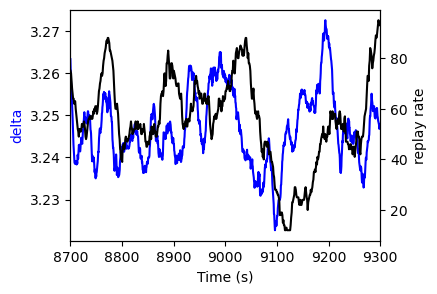

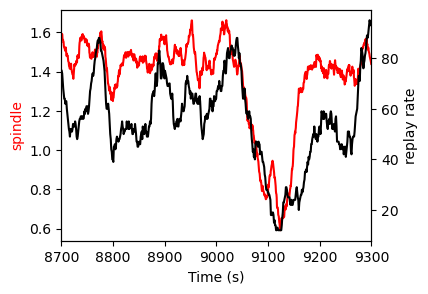

In [3]:


data = ED8_data_dict['spectral_power_dict']

chunk_time= data['chunk_time']
# Delta
delta_spectral_powers = data["delta_spectral_powers"]
delta_spectral_timestamps = data["delta_spectral_timestamps"]
delta_replay_binned = data["delta_replay_binned"]
delta_replay_bin_ts = data["delta_replay_bin_ts"]

# Spindle
spndl_spectral_powers = data["spndl_spectral_powers"]
spndl_spectral_timestamps = data["spndl_spectral_timestamps"]
spndl_replay_binned = data["spndl_replay_binned"]
spndl_replay_bin_ts = data["spndl_replay_bin_ts"]

fig,ax= plt.subplots(1, 1,figsize=(4, 3))
# # Calculate bin centers
var_string = 'delta'
# Calculate log spectral power
log_power = np.log10(delta_spectral_powers)
# Optional: Smooth
smoothed_log_power = convolve_movmean(log_power, 30)
ax.plot(delta_spectral_timestamps,smoothed_log_power, 'blue')
ax.set_xlabel('Time (s)')
ax.set_ylabel('delta',color = 'blue')
ax2 = ax.twinx()
ax2.plot(delta_replay_bin_ts,convolve_movmean(delta_replay_binned,30), color = 'k')
ax2.set_ylabel('replay rate', color = 'k')
ax.set_xlim(chunk_time[0], chunk_time[1])

fig,ax= plt.subplots(1, 1,figsize=(4, 3))
# # Calculate bin centers
var_string = 'spindle'
# Calculate log spectral power
log_power = np.log10(spndl_spectral_powers)
# Optional: Smooth
smoothed_log_power = convolve_movmean(log_power, 30)
ax.plot(spndl_spectral_timestamps,smoothed_log_power, 'red')
ax.set_xlabel('Time (s)')
ax.set_ylabel(var_string,color = 'red')
ax2 = ax.twinx()
ax2.plot(spndl_replay_bin_ts,convolve_movmean(spndl_replay_binned,30), color = 'k')
ax2.set_ylabel('replay rate', color = 'k')
ax.set_xlim(chunk_time[0], chunk_time[1])

# figure C

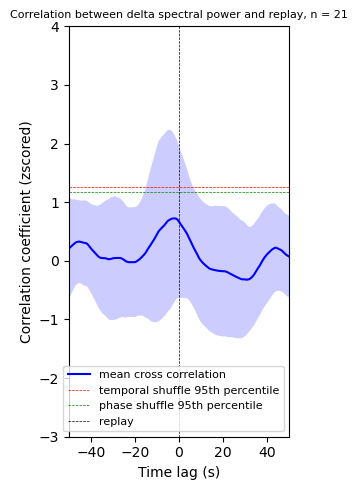

In [4]:
data = ED8_data_dict["delta_replay_x_corr"]
time_lags = data["time_lags"]
mean_delta_x_corr = data["mean_delta_x_corr"]
std_delta_x_corr = data["std_delta_x_corr"]
mean_delta_temporal_shuffle = data["mean_delta_temporal_shuffle"]
mean_delta_phase_shuffle = data["mean_delta_phase_shuffle"]

fig, ax = plt.subplots(figsize=(3, 5))
# Main cross-correlation
ax.plot(
    time_lags,
    mean_delta_x_corr,
    label="mean cross correlation",
    color="blue"
)
ax.fill_between(
    time_lags,
    mean_delta_x_corr - std_delta_x_corr,
    mean_delta_x_corr + std_delta_x_corr,
    alpha=0.2,
    color="blue",
    linewidth=0
)
# 95th percentiles from shuffle distributions
temporal_95 = np.percentile(mean_delta_temporal_shuffle, 95)
phase_95 = np.percentile(mean_delta_phase_shuffle, 95)
ax.axhline(
    temporal_95,
    color="red",
    lw=0.5,
    ls="--",
    label="temporal shuffle 95th percentile"
)
ax.axhline(
    phase_95,
    color="green",
    lw=0.5,
    ls="--",
    label="phase shuffle 95th percentile"
)
# Reference line at replay
ax.axvline(
    0,
    color="black",
    lw=0.5,
    ls="--",
    label="replay"
)
# Labels & formatting
ax.set_xlabel("Time lag (s)", size=10)
ax.set_ylabel("Correlation coefficient (zscored)", size=10)
ax.set_title(
    f"Correlation between delta spectral power and replay, n = 21",
    fontsize=8
)
ax.set_xlim(-50, 50)
ax.set_ylim(-3, 4)
ax.legend(loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()


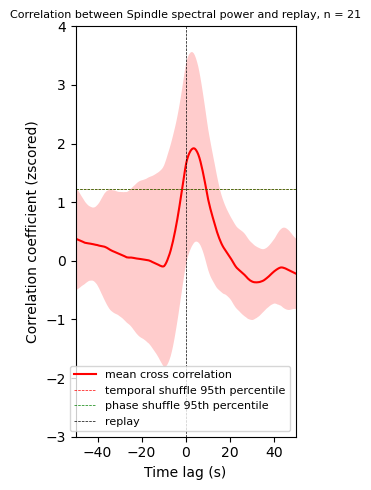

In [5]:
data = ED8_data_dict["spindle_replay_x_corr"]
time_lags = data["time_lags"]
mean_spin_x_corr = data["mean_spin_x_corr"]
std_spin_x_corr = data["std_spin_x_corr"]
mean_spin_temporal_shuffle = data["mean_spin_temporal_shuffle"]
mean_spin_phase_shuffle = data["mean_spin_phase_shuffle"]

fig, ax = plt.subplots(figsize=(3, 5))
# Main cross-correlation
ax.plot(
    time_lags,
    mean_spin_x_corr,
    label="mean cross correlation",
    color="red"
)
ax.fill_between(
    time_lags,
    mean_spin_x_corr - std_spin_x_corr,
    mean_spin_x_corr + std_spin_x_corr,
    alpha=0.2,
    color="red",
    linewidth=0
)
# 95th percentile thresholds from shuffle distributions
temporal_95 = np.percentile(mean_spin_temporal_shuffle, 95)
phase_95 = np.percentile(mean_spin_phase_shuffle, 95)
ax.axhline(
    temporal_95,
    color="red",
    lw=0.5,
    ls="--",
    label="temporal shuffle 95th percentile"
)
ax.axhline(
    phase_95,
    color="green",
    lw=0.5,
    ls="--",
    label="phase shuffle 95th percentile"
)
# Replay reference
ax.axvline(
    0,
    color="black",
    lw=0.5,
    ls="--",
    label="replay"
)

# Labels & formatting
ax.set_xlabel("Time lag (s)", size=10)
ax.set_ylabel("Correlation coefficient (zscored)", size=10)
ax.set_title(
    f"Correlation between Spindle spectral power and replay, n = 21",
    fontsize=8
)
ax.set_xlim(-50, 50)
ax.set_ylim(-3, 4)
ax.legend(loc="lower right", fontsize=8)

plt.tight_layout()
plt.show()


# figure D

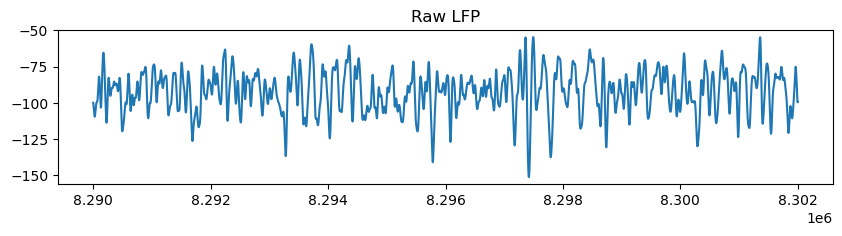

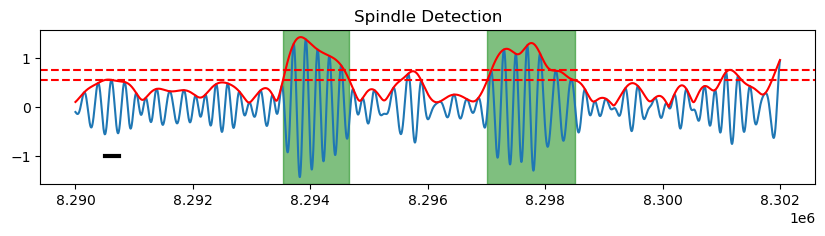

In [6]:
data = ED8_data_dict["lfp_spindle_example"]
timeframe = data["timeframe"]
time_indices = data["time_indices"]
average_lfp = data["average_lfp"]
spindle_bandpassed = data["spindle_bandpassed"]
smoothed_envelope = data["smoothed_envelope"]
upper_threshold = data["upper_threshold"]
lower_threshold = data["lower_threshold"]
spindle_start_ends = data["spindle_start_ends"]
sampling_rate = int(data["sampling_rate"])


fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(
    time_indices,
    average_lfp[timeframe[0]:timeframe[1]]
)
ax.set_title("Raw LFP")
plt.show()
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(
    time_indices,
    spindle_bandpassed[timeframe[0]:timeframe[1]],
    label="Bandpassed"
)
ax.plot(
    time_indices,
    smoothed_envelope[timeframe[0]:timeframe[1]],
    color="r",
    label="Envelope"
)
ax.axhline(upper_threshold, color="red", linestyle="--", label="Upper Threshold")
ax.axhline(lower_threshold, color="red", linestyle="--", label="Lower Threshold")

# Highlight spindle events
for start_sec, end_sec in spindle_start_ends:
    start = start_sec * sampling_rate
    end = end_sec * sampling_rate
    if start > timeframe[0] and end < timeframe[1]:
        ax.axvspan(start, end, alpha=0.5, color="green")
ax.set_title("Spindle Detection")

# Time scale bar
line_duration = int(sampling_rate / 10)  # 100 ms
start_x = timeframe[0] + 500
end_x = start_x + line_duration
y_value = -1
ax.plot([start_x, end_x], [y_value, y_value], color="k", linewidth=3)
plt.show()



# figure E

(0.0, 5.0)

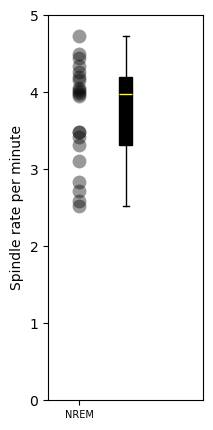

In [7]:
fig,ax,= plt.subplots(1, 1,figsize=(2, 5))
ax.plot(np.zeros(len(ED8_data_dict['nrem_epm'])),ED8_data_dict['nrem_epm'],'o', alpha = 0.4, markersize = 10, markeredgewidth = 0, color = 'k')
# add a box plot
ax.boxplot(ED8_data_dict['nrem_epm'], positions=[0.3], widths=0.08, patch_artist=True, boxprops=dict(facecolor='k', color='k'), medianprops=dict(color='yellow'))
# # remove the x ticks
ax.set_xticks([0])
# add x tick labels 
ax.set_xticklabels(['NREM'], fontsize = 7)
ax.set_ylabel('Spindle rate per minute')
ax.set_ylim(0,5)

# figure F

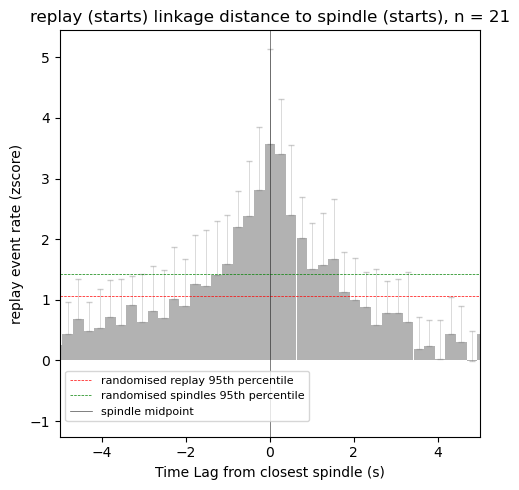

In [8]:

data = ED8_data_dict['spindle_linkage_distance']

bins = data["bins"]
bin_centres = data["bin_centres"]
mean_spindle_linkage_distance = data["mean_spindle_linkage_distance"]
std_spindle_linkage_distance = data["std_spindle_linkage_distance"]
mean_spindle_linkage_distance_random_replay = data["mean_spindle_linkage_distance_random_replay"]
mean_spindle_linkage_distance_random_spindles = data["mean_spindle_linkage_distance_random_spindles"]

#######

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Bin widths
widths = np.diff(bins)

# Error bar styling
error_style = dict(
    ecolor="grey",
    elinewidth=0.5,
    capsize=2,
    alpha=0.4
)

# Bar plot
ax.bar(
    bin_centres,
    mean_spindle_linkage_distance,
    width=widths,
    yerr=[
        np.zeros_like(std_spindle_linkage_distance),
        std_spindle_linkage_distance
    ],
    align="center",
    alpha=0.6,
    color="grey",
    error_kw=error_style
)

# 95th percentile thresholds
replay_95 = np.percentile(
    mean_spindle_linkage_distance_random_replay, 95
)
spindle_95 = np.percentile(
    mean_spindle_linkage_distance_random_spindles, 95
)

ax.axhline(
    replay_95,
    color="red",
    lw=0.5,
    ls="--",
    label="randomised replay 95th percentile"
)

ax.axhline(
    spindle_95,
    color="green",
    lw=0.5,
    ls="--",
    label="randomised spindles 95th percentile"
)

# Formatting
ax.set_xlabel("Time Lag from closest spindle (s)")
ax.set_ylabel("replay event rate (zscore)")
ax.set_title(
    f"replay (starts) linkage distance to spindle (starts), n = 21"
)

ax.axvline(
    0,
    color="k",
    alpha=0.7,
    label="spindle midpoint",
    linewidth=0.5
)

ax.set_xlim(-5, 5)
ax.legend(
    loc="center left",
    bbox_to_anchor=(0, 0.1),
    fontsize=8
)

plt.tight_layout()
plt.show()



# figure G

array([-1.        , -0.99959992, -0.99919984, ...,  0.99919984,
        0.99959992,  1.        ], shape=(5000,))

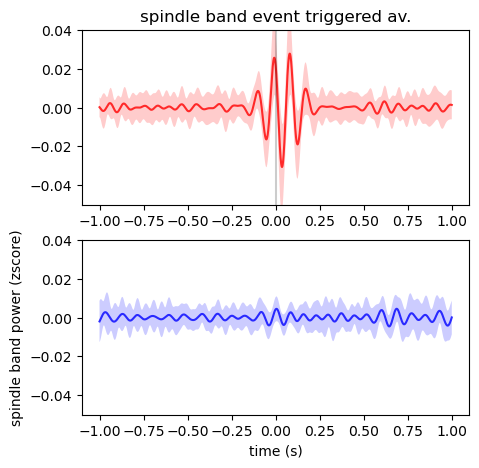

In [9]:
data = ED8_data_dict['ETA']

mean_signal_across_all = data["mean_signal_across_all"]
std_across_all = data["std_across_all"]
random_mean_signal_across_all = data["random_mean_signal_across_all"]
random_std_across_all = data["random_std_across_all"]

fig,ax= plt.subplots(2, 1,figsize=(5, 5))

plot_ETA(ax,mean_signal_across_all,std_across_all,random_mean_signal_across_all,random_std_across_all)


# figure J

Text(0, 0.5, 'Replay linked to spindles')

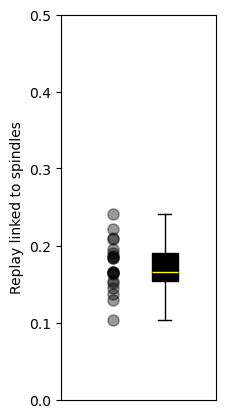

In [10]:
spin_linked_replay= ED8_data_dict['spin_linked_replay']

fig,ax,= plt.subplots(1, 1,figsize=(2, 5))


ax.plot(np.zeros(len(spin_linked_replay)),spin_linked_replay,'o', alpha = 0.4, markersize = 8, color = 'k')
# add a box plot
ax.boxplot(spin_linked_replay, positions=[0.2], widths=0.1, patch_artist=True, boxprops=dict(facecolor='k', color='k'), medianprops=dict(color='yellow'))
ax.set_ylim(0,0.5)
ax.set_xlim(-0.2,0.4)
# remove the x ticks
ax.set_xticks([])
ax.set_ylabel('Replay linked to spindles')

# figure K 

(0.0, 1.0)

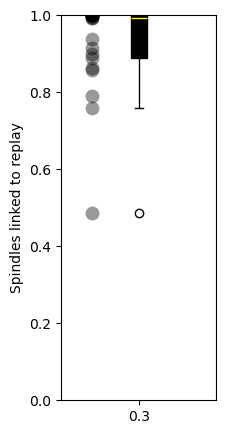

In [11]:

linked_proportion= ED8_data_dict['linked_proportion']
    
fig,ax,= plt.subplots(1, 1,figsize=(2, 5))
ax.plot(np.zeros(len(linked_proportion)),linked_proportion,'o', alpha = 0.4, markersize = 10, markeredgewidth = 0, color = 'k')
# # add a box plot
ax.boxplot(linked_proportion, positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='k', color='k'), medianprops=dict(color='yellow'))
# # # remove the x ticks
ax.set_ylabel('Spindles linked to replay')
ax.set_ylim(0,1)

# figure L

ShapiroResult(statistic=np.float64(0.8663454146686502), pvalue=np.float64(0.010140408277513233))
ShapiroResult(statistic=np.float64(0.9174009687943279), pvalue=np.float64(0.07700374181383939))
WilcoxonResult(statistic=np.float64(45.0), pvalue=np.float64(0.023950576782226562))
{'test': 'Wilcoxon signed-rank', 'W': np.float64(45.0), 'p': np.float64(0.023950576782226562), 'rank_biserial_r': np.float64(-0.5714285714285714)}


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_58092\730341628.py:3: RuntimeWarning: Mean of empty slice
  linked_event_lens = [np.nanmean(item) for item in linked_event_lens]
c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\ED_8\Utilities\utils.py:968: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return {"test": "Wilcoxon signed-rank", "W": res['W-val'][0], "p": res['p-val'][0], "rank_biserial_r": res['RBC'][0]}


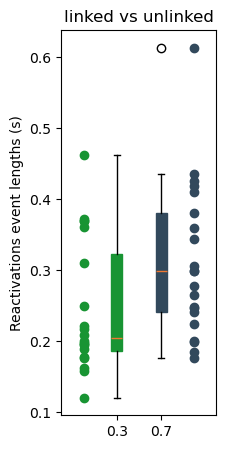

In [12]:
linked_event_lens = ED8_data_dict['linked']['event_lens']
unlinked_event_lens = ED8_data_dict['unlinked']['event_lens']
linked_event_lens = [np.nanmean(item) for item in linked_event_lens]
unlinked_event_lens = [np.nanmean(item) for item in unlinked_event_lens]

### PLOT
fig, ax = plt.subplots(figsize=(2, 5))
ax.plot(np.zeros(len(linked_event_lens)), linked_event_lens, 'o', color = '#189433')
ax.boxplot([x for x in linked_event_lens if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor="#189433", color='#189433'), medianprops=dict(color='#EE7832'))
ax.plot(np.ones(len(unlinked_event_lens)), unlinked_event_lens, 'o', color = '#32495C')
ax.boxplot([x for x in unlinked_event_lens if not np.isnan(x)], positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#32495C', color='#32495C'), medianprops=dict(color='#EE7832'))
ax.set_ylabel('Reactivations event lengths (s)')
ax.set_title('linked vs unlinked')
### STATS
a = [x for x in linked_event_lens if not np.isnan(x)]
b = [x for x in unlinked_event_lens if not np.isnan(x)]
print(scipy.stats.shapiro(a))
print(scipy.stats.shapiro(b))
# p is greater than 0.05 for both, so we fail to reject the null hypothesis that the data is normally distributed
print(scipy.stats.wilcoxon(linked_event_lens, unlinked_event_lens,nan_policy='omit'))
print(effect_size(x=linked_event_lens, y=unlinked_event_lens, test='wilcoxon'))

# figure M

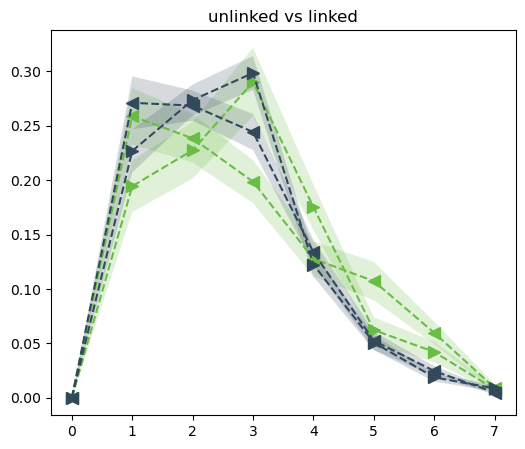

ShapiroResult(statistic=np.float64(0.8576212731786002), pvalue=np.float64(1.744496463167943e-11))
ShapiroResult(statistic=np.float64(0.8924007850346327), pvalue=np.float64(1.0779793335912844e-09))
ShapiroResult(statistic=np.float64(0.8677207709454446), pvalue=np.float64(5.357105250836415e-11))
ShapiroResult(statistic=np.float64(0.8754718610456639), pvalue=np.float64(1.317897591120251e-10))
----------------------------
permanova - forward reverse
----------------------------
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      42
number of groups                  2
test statistic             3.345871
p-value                    0.014299
number of permutations        10000
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.74478
-------------------
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      42
number of groups                  2
test statistic             2.213

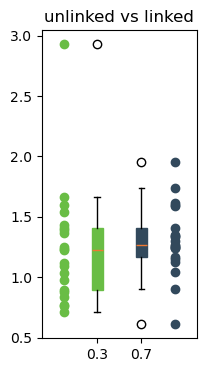

Inset: Difference from expected ------------------------
Test statistic: 2.3095942194862547
P-value: 0.031710042340827735
{'cohens_d': np.float64(0.503994777877534)}
--------------------
Test statistic: 4.866774290055714
P-value: 9.341924923733473e-05
{'cohens_d': np.float64(1.0620172178307277)}
----------------------
Inset: comparison forward/reverse ------------------------
ShapiroResult(statistic=np.float64(0.8035892796189777), pvalue=np.float64(0.0007447922912890895))
ShapiroResult(statistic=np.float64(0.960275394449744), pvalue=np.float64(0.5216901344904668))
WilcoxonResult(statistic=np.float64(75.0), pvalue=np.float64(0.16780662536621094))
{'test': 'Wilcoxon signed-rank', 'W': np.float64(75.0), 'p': np.float64(0.16780662536621094), 'rank_biserial_r': np.float64(-0.35064935064935066)}


c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\ED_8\Utilities\utils.py:968: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return {"test": "Wilcoxon signed-rank", "W": res['W-val'][0], "p": res['p-val'][0], "rank_biserial_r": res['RBC'][0]}


In [13]:
bins_ = [0.1, 0.2, 1,2, 5, 10,20,40]
animals_list = ED8_data_dict['linked']['animals']

linked_f_warp_factors, linked_r_warp_factors, linked_forward_total, linked_reverse_total = extract_mean_warps(pd.DataFrame(ED8_data_dict['linked']['regression']), bins_,animals_list)
linked_proportion_forward_v_reverse = np.array(linked_forward_total)/np.array(linked_reverse_total)
unlinked_f_warp_factors, unlinked_r_warp_factors, unlinked_forward_total, unlinked_reverse_total = extract_mean_warps(pd.DataFrame(ED8_data_dict['unlinked']['regression']), bins_,animals_list)
unlinked_proportion_forward_v_reverse = np.array(unlinked_forward_total)/np.array(unlinked_reverse_total)

############################################################### PLOT 

fig,ax = plt.subplots(1, 1,figsize=(6, 5))
color_ = '#69BD45'
plot_warp_factors(ax, linked_f_warp_factors, linked_r_warp_factors, bins_, color_)
color_ = '#32495C'
plot_warp_factors(ax, unlinked_f_warp_factors, unlinked_r_warp_factors, bins_, color_)
ax.set_title('unlinked vs linked')
plt.show()

## STATS

print(scipy.stats.shapiro([item for sublist in linked_f_warp_factors for item in sublist]))
print(scipy.stats.shapiro([item for sublist in linked_r_warp_factors for item in sublist]))
print(scipy.stats.shapiro([item for sublist in unlinked_f_warp_factors for item in sublist]))
print(scipy.stats.shapiro([item for sublist in unlinked_r_warp_factors for item in sublist]))
print('----------------------------')
print('permanova - forward reverse')
print('----------------------------')
permanova_forward_vs_reverse(linked_f_warp_factors, linked_r_warp_factors)
print('-------------------')
permanova_forward_vs_reverse(unlinked_f_warp_factors, unlinked_r_warp_factors)
print('----------------------------')
print('permanova - group differences')
print('----------------------------')
# PERMANOVA late vs early diff
el_grouping = group_difference_permanova(linked_f_warp_factors, linked_f_warp_factors, unlinked_f_warp_factors, unlinked_f_warp_factors)
print('----------------------------')
print('posthoc - group differences')
print('----------------------------')
# Combine:
combined_data = np.vstack([
    np.asarray(linked_f_warp_factors),
    np.asarray(linked_r_warp_factors),
    np.asarray(unlinked_f_warp_factors),
    np.asarray(unlinked_r_warp_factors)
])
combined_labels = np.array(el_grouping)
feature_results = pairwise_permanova_by_feature(
    combined_data,
    combined_labels,
    method='bonferroni',
    permutations=10000
)
print("Significant feature-wise pairwise PERMANOVA results (α=0.05):")
for res in feature_results:
    p = res["p_value"]
    if p < 0.05:
        stars = '***' if p < 0.001 else '**' if p < 0.01 else '*'
        print(f"Feature {res['feature']}: {res['group1']} vs {res['group2']}")
        print(f"  statistic = {res['test_stat']:.4f}, p (corr.) = {p:.4g} {stars}")
        print(f"R2 = {res['R2']}")
        print("---")


#### PLOT inset
fig, ax = plt.subplots(figsize=(2, 4))
ax.plot(np.zeros(len(linked_proportion_forward_v_reverse)),linked_proportion_forward_v_reverse,'o', color = '#69BD45')
ax.boxplot([x for x in linked_proportion_forward_v_reverse if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#69BD45', color='#69BD45'), medianprops=dict(color='#EE7832'))
ax.plot(np.ones(len(unlinked_proportion_forward_v_reverse)),unlinked_proportion_forward_v_reverse,'o', color = '#32495C')
ax.boxplot([x for x in unlinked_proportion_forward_v_reverse if not np.isnan(x)], positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#32495C', color='#32495C'), medianprops=dict(color='#EE7832'))
ax.set_title('unlinked vs linked')
plt.show()

### STATS for inset
print('Inset: Difference from expected ------------------------')
# Perform one-sample t-test
statistic, p_value = ttest_1samp(linked_proportion_forward_v_reverse, 1.0)
# Print the test statistic and p-value
print("Test statistic:", statistic)
print("P-value:", p_value)
print(effect_size(x=linked_proportion_forward_v_reverse,test='one_sample_ttest',popmean = 1))

print('--------------------')
# Perform one-sample t-test
statistic, p_value = ttest_1samp(unlinked_proportion_forward_v_reverse, 1.0, nan_policy="omit")
# Print the test statistic and p-value
print("Test statistic:", statistic)
print("P-value:", p_value)
unlinked_proportion_forward_v_reverse_nanr = unlinked_proportion_forward_v_reverse[~np.isnan(unlinked_proportion_forward_v_reverse)]
print(effect_size(x=unlinked_proportion_forward_v_reverse_nanr,test='one_sample_ttest',popmean = 1))

print('----------------------')
print('Inset: comparison forward/reverse ------------------------')
print(scipy.stats.shapiro(linked_proportion_forward_v_reverse))
print(scipy.stats.shapiro(unlinked_proportion_forward_v_reverse))
# not all normal so use wilcoxn signed rank
print(scipy.stats.wilcoxon(linked_proportion_forward_v_reverse, unlinked_proportion_forward_v_reverse,nan_policy='omit'))
print(effect_size(x=linked_proportion_forward_v_reverse, y=unlinked_proportion_forward_v_reverse, test='wilcoxon'))

# figure N

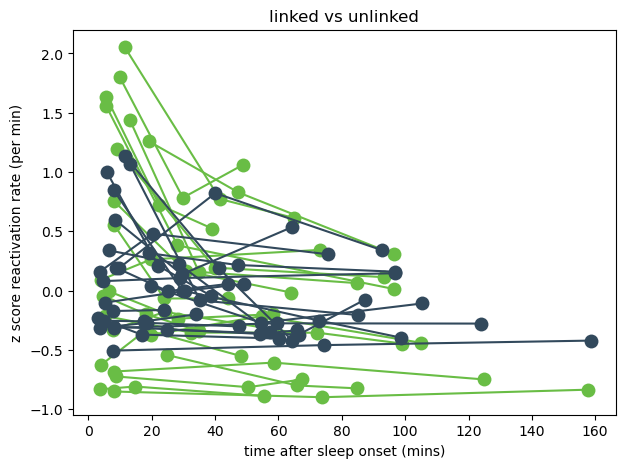

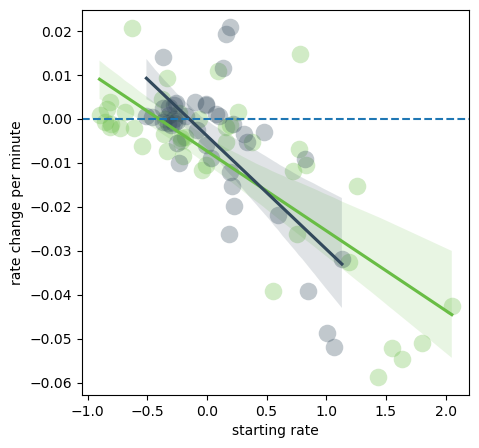

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.8203 2.0000 82.0000  8.9793 0.0003
         Pillai's trace 0.1797 2.0000 82.0000  8.9793 0.0003
 Hotelling-Lawley trace 0.2190 2.0000 82.0000  8.9793 0.0003
    Roy's greatest root 0.2190 2.0000 82.0000  8.9793 0.0003
------------------------------------------------------------
                                                            
------------------------------------------------------------
         groups         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9823 2.0000 82.0000  0.7394 0.4806
         Pillai's trace 0.0177 2.0000 82.0000  0.7394 0.4806
 Hotelling-Lawley trace 0.0180 2.0000 82.0

In [14]:
# 1. Flatten
flat = flatten(ED8_data_dict['linked']['binned_rate'])
# 2. Compute mean & std
mean = np.nanmean(flat)
std = np.nanstd(flat)
# 3. Recurse to z-score
normalized_linked = zscoreize(ED8_data_dict['linked']['binned_rate'], mean, std)

# 1. Flatten
flat = flatten(ED8_data_dict['unlinked']['binned_rate'])
# 2. Compute mean & std
mean = np.nanmean(flat)
std = np.nanstd(flat)
# 3. Recurse to z-score
normalized_unlinked = zscoreize(ED8_data_dict['unlinked']['binned_rate'], mean, std)


group1_data, group2_data = plot_decay(normalized_linked  ,ED8_data_dict['linked']['bins_relative_so'],normalized_unlinked ,ED8_data_dict['unlinked']['bins_relative_so'], '#69BD45','#32495C','linked vs unlinked')
plt.show()

###################### STATS
df1 = pd.DataFrame(group1_data)
df2 = pd.DataFrame(group2_data)

# Combine the data into one DataFrame
data = pd.concat([df1, df2], axis=0)

# Create a grouping variable
groups = np.array(['linked'] * len(df1) + ['unlinked'] * len(df2))

# Perform MANOVA
manova = MANOVA.from_formula('x + y ~ groups', data=data)

# Print the MANOVA results
print(manova.mv_test())

# Compute partial eta-squared
eta_squared = compute_partial_eta_squared(manova.mv_test())
print("Partial eta-squared for each effect:", eta_squared)

### STATS for inset
# Fit linear regression for Group 1
model_group1 = sm.OLS.from_formula('y ~ x', data=df1).fit()
model_group2 = sm.OLS.from_formula('y ~ x', data=df2).fit()

print('PLOT 2:')
# Print the summary of each model
print("Group 1 (linked):")
# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group1.f_pvalue)
print('r2 = ')
print(model_group1.rsquared)

print("Group 2 (unlinked):")
# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group2.f_pvalue)
print('r2 = ')
print(model_group2.rsquared)

# figure O

c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


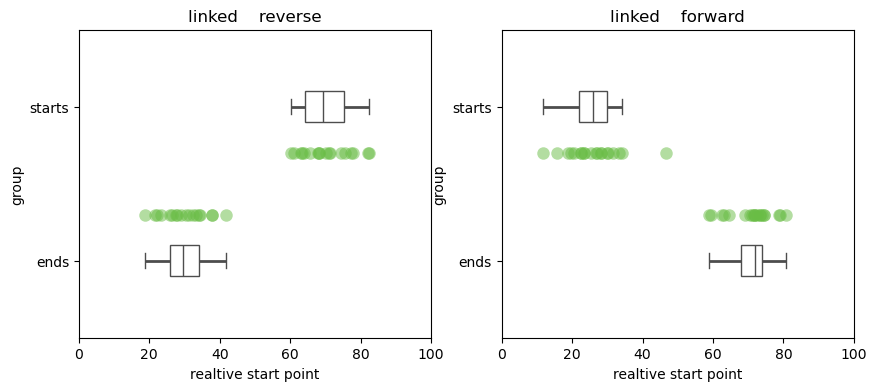

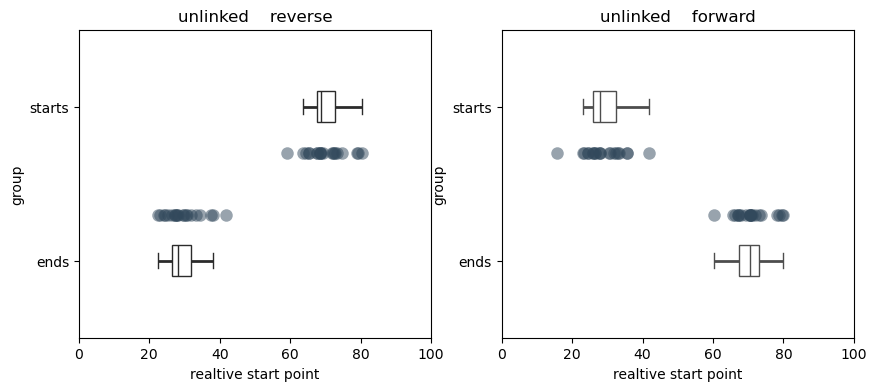

ShapiroResult(statistic=np.float64(0.9515132885266412), pvalue=np.float64(0.44924853226694567))
ShapiroResult(statistic=np.float64(0.9594748787520659), pvalue=np.float64(0.5334123915271906))
ShapiroResult(statistic=np.float64(0.9856815857475467), pvalue=np.float64(0.9896629615510701))
ShapiroResult(statistic=np.float64(0.9294240981794044), pvalue=np.float64(0.15052482819749347))
ShapiroResult(statistic=np.float64(0.9676918432915715), pvalue=np.float64(0.681599136764739))
ShapiroResult(statistic=np.float64(0.9699470601890785), pvalue=np.float64(0.7318643818822168))
ShapiroResult(statistic=np.float64(0.9409234849132666), pvalue=np.float64(0.22725189330651396))
ShapiroResult(statistic=np.float64(0.9354670857781555), pvalue=np.float64(0.17708648014706208))
_____________________________________________________________________________________________
                   Multivariate linear model
                                                               
----------------------------------

c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [15]:

fig,[ax,ax2] = plt.subplots(1, 2,figsize=(10, 4))
all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED8_data_dict['linked']['start_end']))
plot_start_end_times(all_chunk_reverse_start_mean,all_chunk_forward_start_mean,all_chunk_reverse_end_mean,all_chunk_forward_end_mean,ax,ax2,'linked','#69BD45')

fig,[ax,ax2] = plt.subplots(1, 2,figsize=(10, 4))
all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED8_data_dict['unlinked']['start_end']))
plot_start_end_times(all_chunk_reverse_start_mean,all_chunk_forward_start_mean,all_chunk_reverse_end_mean,all_chunk_forward_end_mean,ax,ax2,'unlinked','#32495C')

plt.show()
#### STATS

linked_all_chunk_reverse_start_mean, linked_all_chunk_forward_start_mean, linked_all_chunk_reverse_end_mean, linked_all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED8_data_dict['linked']['start_end']))
unlinked_all_chunk_reverse_start_mean, unlinked_all_chunk_forward_start_mean, unlinked_all_chunk_reverse_end_mean, unlinked_all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED8_data_dict['unlinked']['start_end']))

group1= [x for x in linked_all_chunk_reverse_start_mean if not np.isnan(x)] 
group2 = [x for x in linked_all_chunk_forward_start_mean if not np.isnan(x)] 
group3 = [x for x in linked_all_chunk_reverse_end_mean if not np.isnan(x)] 
group4 = [x for x in linked_all_chunk_forward_end_mean if not np.isnan(x)] 
group5 = [x for x in unlinked_all_chunk_reverse_start_mean if not np.isnan(x)] 
group6 = [x for x in unlinked_all_chunk_forward_start_mean if not np.isnan(x)] 
group7 = [x for x in unlinked_all_chunk_reverse_end_mean if not np.isnan(x)] 
group8 = [x for x in unlinked_all_chunk_forward_end_mean if not np.isnan(x)] 

for group in [group1, group2, group3, group4, group5, group6, group7, group8]:
    print(scipy.stats.shapiro(group))
    
df_linked = pd.DataFrame({
    'group':       ['linked'] * len(linked_all_chunk_forward_start_mean),
    'forward_start': linked_all_chunk_forward_start_mean,
    'forward_end':   linked_all_chunk_forward_end_mean,
    'reverse_start': linked_all_chunk_reverse_start_mean,
    'reverse_end':   linked_all_chunk_reverse_end_mean,
})

df_unlinked = pd.DataFrame({
    'group':       ['unlinked'] * len(unlinked_all_chunk_forward_start_mean),
    'forward_start': unlinked_all_chunk_forward_start_mean,
    'forward_end':   unlinked_all_chunk_forward_end_mean,
    'reverse_start': unlinked_all_chunk_reverse_start_mean,
    'reverse_end':   unlinked_all_chunk_reverse_end_mean,
})


print('_____________________________________________________________________________________________')
from statsmodels.multivariate.manova import MANOVA
# Concatenate them:
df = pd.concat([df_linked, df_unlinked], ignore_index=True)
#  MANOVA
manova = MANOVA.from_formula('forward_start + forward_end +reverse_start +reverse_end  ~ group', data=df)
print(manova.mv_test())

# Compute partial eta-squared
eta_squared = compute_partial_eta_squared(manova.mv_test())
print("Partial eta-squared for each effect:", eta_squared)



# figure P

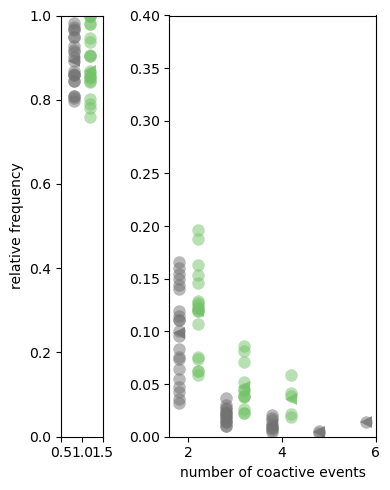

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      42
number of groups                  2
test statistic              0.23662
p-value                     0.70243
number of permutations        10000
Name: PERMANOVA results, dtype: object
***************************************************
PERMANOVA effect size R²: 0.70633


In [16]:
linked_counts = collapse(convert_word_keys_to_numeric(ED8_data_dict['linked']['coactive_freqs']))
unlinked_counts = collapse(convert_word_keys_to_numeric(ED8_data_dict['unlinked']['coactive_freqs']))

colors = {"unlinked": "#727272", "linked": "#74C269"}
offset = 0.2


# PLOT
# ============================================================
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(4, 5),
    gridspec_kw={'width_ratios': [2, 10]}
)

# Left panel: coactive = 1 (median)
for counts, color, off in [
    (linked_counts, colors["linked"], offset),
    (unlinked_counts, colors["unlinked"], -offset)
]:
    plot_group(ax1, counts, ['1'], off, color, np.median)

ax1.set_xlim(0.5, 1.5)
ax1.set_ylim(0, 1)
ax1.set_ylabel('relative frequency')


# Right panel: coactive >= 2 (mean)
keys = [str(i) for i in range(2, 7)]

for counts, color, off in [
    (linked_counts, colors["linked"], offset),
    (unlinked_counts, colors["unlinked"], -offset)
]:
    plot_group(ax2, counts, keys, off, color, np.mean)

ax2.set_xlabel('number of coactive events')
ax2.set_ylim(0, 0.4)

plt.tight_layout()
plt.show()


# ============================================================
# STATS
# ============================================================
permanova_coactive_freqs(linked_counts, unlinked_counts)

# figure Q

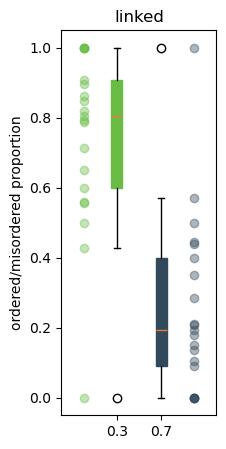

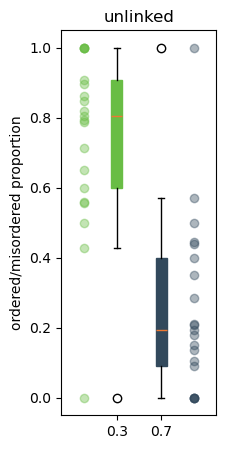

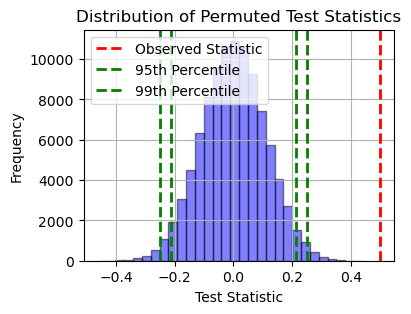

- p-value: 0.0
- 99th percentile of permuted statistics: 0.2508213180990011
- Observed Test Statistic: 0.49841261960299477
cohens d = 2.010567586993943
------------------


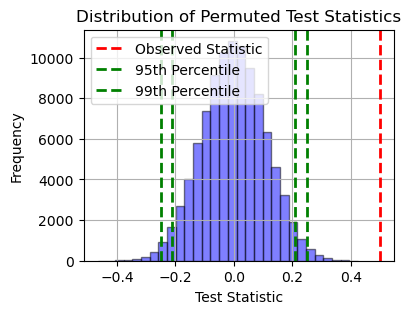

- p-value: 0.0
- 99th percentile of permuted statistics: 0.2499748083058973
- Observed Test Statistic: 0.49841261960299477
cohens d = 2.010567586993943
------------------
ShapiroResult(statistic=np.float64(0.8659900520951987), pvalue=np.float64(0.008112056845778818))
ShapiroResult(statistic=np.float64(0.8659900520951984), pvalue=np.float64(0.0081120568457787))
ShapiroResult(statistic=np.float64(0.8659900520951987), pvalue=np.float64(0.008112056845778818))
ShapiroResult(statistic=np.float64(0.8659900520951984), pvalue=np.float64(0.0081120568457787))
------------------
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      42
number of groups                  2
test statistic                  0.0
p-value                         1.0
number of permutations          999
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.55169


In [17]:
# PLOT
plot_ordered_misrodered(ED8_data_dict['linked']['ordered_misordered'],'linked','ordered/misordered proportion')
plot_ordered_misrodered(ED8_data_dict['unlinked']['ordered_misordered'],'unlinked','ordered/misordered proportion')

# STATS
list1 = [float(item[0]) for item in ED8_data_dict['linked']['ordered_misordered']] 
list2 = [float(item[1]) for item in ED8_data_dict['unlinked']['ordered_misordered']] 
list1= [x for x in list1 if not np.isnan(x)] 
list2= [x for x in list2 if not np.isnan(x)] 
permutation_test(list1, list2)
print(f'cohens d = {cohens_d(list1, list2)}')

print('------------------')
list3 = [float(item[0]) for item in ED8_data_dict['unlinked']['ordered_misordered']] 
list4 = [float(item[1]) for item in ED8_data_dict['linked']['ordered_misordered']] 
list3= [x for x in list3 if not np.isnan(x)] 
list4= [x for x in list4 if not np.isnan(x)] 
permutation_test(list3, list4)
print(f'cohens d = {cohens_d(list3, list4)}')

# test for normality
print('------------------')
print(scipy.stats.shapiro(list1))
print(scipy.stats.shapiro(list2))
print(scipy.stats.shapiro(list3))
print(scipy.stats.shapiro(list4))
print('------------------')
# parmanova between groups
permanova_ordered_misordered(ED8_data_dict['linked']['ordered_misordered'], ED8_data_dict['unlinked']['ordered_misordered'])


# figure R

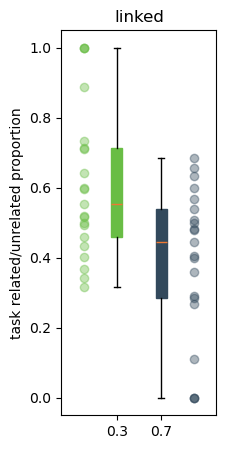

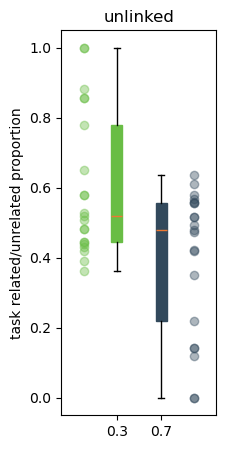

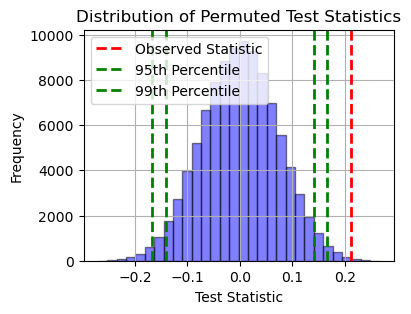

- p-value: 0.00118
- 99th percentile of permuted statistics: 0.1653789611830634
- Observed Test Statistic: 0.21074859688640485
cohens d = 0.9983588779796929
------------------


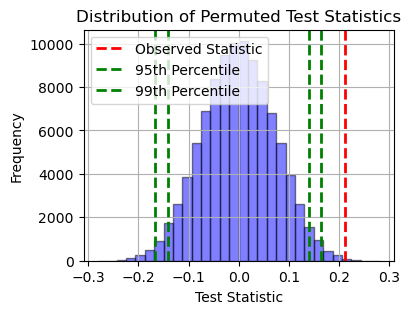

- p-value: 0.00101
- 99th percentile of permuted statistics: 0.16431134293347338
- Observed Test Statistic: 0.2107485968864049
cohens d = 0.9983588779796932
ShapiroResult(statistic=np.float64(0.9126579034299322), pvalue=np.float64(0.06197578614050367))
ShapiroResult(statistic=np.float64(0.857971945976739), pvalue=np.float64(0.005845862013744675))
ShapiroResult(statistic=np.float64(0.8579719459767392), pvalue=np.float64(0.005845862013744734))
ShapiroResult(statistic=np.float64(0.9126579034299322), pvalue=np.float64(0.06197578614050367))
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      42
number of groups                  2
test statistic                 -0.0
p-value                         1.0
number of permutations          999
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.61931


In [18]:
plot_ordered_misrodered(ED8_data_dict['linked']['task_nontask'],'linked','task related/unrelated proportion')
plot_ordered_misrodered(ED8_data_dict['unlinked']['task_nontask'],'unlinked','task related/unrelated proportion')


# STATS
list1 = [float(item[0]) for item in ED8_data_dict['linked']['task_nontask']] 
list2 = [float(item[1]) for item in ED8_data_dict['unlinked']['task_nontask']] 
list1= [x for x in list1 if not np.isnan(x)] 
list2= [x for x in list2 if not np.isnan(x)] 
permutation_test(list1, list2)
print(f'cohens d = {cohens_d(list1, list2)}')

print('------------------')
list3 = [float(item[0]) for item in ED8_data_dict['unlinked']['task_nontask']] 
list4 = [float(item[1]) for item in ED8_data_dict['linked']['task_nontask']] 
list3= [x for x in list3 if not np.isnan(x)] 
list4= [x for x in list4 if not np.isnan(x)] 
permutation_test(list3, list4)
print(f'cohens d = {cohens_d(list3, list4)}')

# test for normality
print(scipy.stats.shapiro(list1))
print(scipy.stats.shapiro(list2))
print(scipy.stats.shapiro(list3))
print(scipy.stats.shapiro(list4))

#permanova for nrem vs rem
permanova_ordered_misordered(ED8_data_dict['linked']['task_nontask'], ED8_data_dict['linked']['task_nontask'])


# figure S

Fitted parameters: a = 0.03367378099734572, b = 3.201351083248676
R-squared: 0.9922724755147638
p-values: [np.float64(2.0593868998775022e-05), np.float64(1.4353792376908814e-08)]
Fitted parameters: a = 0.0328558221580791, b = 3.210093530299527
R-squared: 0.9931276627714299
p-values: [np.float64(1.3138176551796832e-05), np.float64(8.652554006616242e-09)]
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.3435 2.0000 17.0000 16.2478 0.0001
         Pillai's trace 0.6565 2.0000 17.0000 16.2478 0.0001
 Hotelling-Lawley trace 1.9115 2.0000 17.0000 16.2478 0.0001
    Roy's greatest root 1.9115 2.0000 17.0000 16.2478 0.0001
------------------------------------------------------------
                                                    

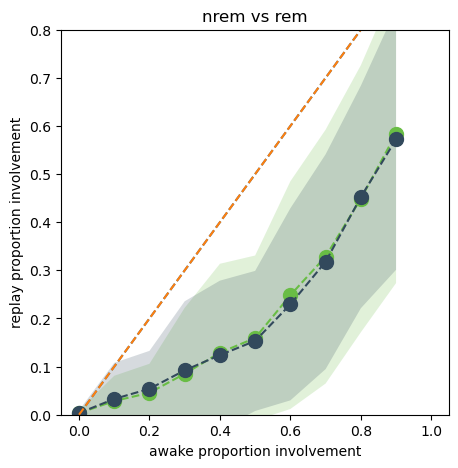

In [19]:
awake_seqbyseq_neuron_involvements = ED8_data_dict['neuron_involvement_master']['awake_seqbyseq_neuron_involvements']

fig, ax = plt.subplots(1, 1,figsize=(5, 5))
nrem_awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(awake_seqbyseq_neuron_involvements,ED8_data_dict['linked']['sleep_seqbyseq_neuron_involvements'])
plot_awake_sleep_relationship(nrem_awake_sleep_relationship,'#69BD45',ax)
rem_awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(awake_seqbyseq_neuron_involvements,ED8_data_dict['unlinked']['sleep_seqbyseq_neuron_involvements'])
plot_awake_sleep_relationship(rem_awake_sleep_relationship,'#32495C',ax)
ax.set_title('nrem vs rem')

## STATS
m =manova_groups_neuron_involvement(nrem_awake_sleep_relationship,rem_awake_sleep_relationship)
eta_squared = compute_partial_eta_squared(m)
print("Partial eta-squared for each effect:", eta_squared)
